**PROJECT 2: CREDIT-SCORE CLASSIFICATION**

**Importing essential Libraries.**

In [ ]:
import numpy as np
import pandas as pd


**Loading the Dataset.**

In [ ]:
df=pd.read_csv('/content/Credit Score Classification Dataset.csv')


**Checking the number of missing values.**

In [ ]:
df.isna().sum()

Age                   0
Gender                6
Income                9
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

**Columns of dataset.**

In [ ]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

**Printing First and Last 5 rows.**

In [ ]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35,Female,75000.0,Doctorate,Married,1,Owned,High
3,40,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [ ]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500.0,Master's Degree,Single,0,Owned,High
163,49,Female,77500.0,Doctorate,Married,1,Owned,High


**Datatype of each column.**

In [ ]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

**Shape of Dataset.**

In [ ]:
df.shape

(164, 8)

In [ ]:
df.describe()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,37.975610,0.457317,83871.951220,2.060976,0.469512,0.652439,0.323171
std,8.477289,0.499701,31287.731673,1.391010,0.500598,0.883346,0.469120
min,25.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000
25%,30.750000,0.000000,60000.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,82500.000000,2.000000,0.000000,0.000000,0.000000
75%,45.000000,1.000000,105000.000000,3.000000,1.000000,1.000000,1.000000
max,53.000000,1.000000,162500.000000,4.000000,1.000000,3.000000,1.000000


**Encoding the Dataset.**

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df.isna().sum()

Age                   0
Gender                0
Income                9
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].median())
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Education']=le.fit_transform(df['Education'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['Home Ownership']=le.fit_transform(df['Home Ownership'])
df


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000.0,1,1,0,1,High
1,30,1,100000.0,4,0,2,0,High
2,35,0,75000.0,2,0,1,0,High
3,40,1,125000.0,3,1,0,0,High
4,45,0,100000.0,1,0,3,0,High
...,...,...,...,...,...,...,...,...
159,29,0,27500.0,3,1,0,1,Low
160,34,1,47500.0,0,1,0,1,Average
161,39,0,62500.0,1,0,2,0,High
162,44,1,87500.0,4,1,0,0,High


**Seperating x as input label and y as output label.**

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

**Splitting the dataset into Training and Testing Data.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
y_train

array(['High', 'High', 'High', 'Average', 'Average', 'High', 'High',
       'Average', 'High', 'Low', 'High', 'High', 'High', 'High', 'High',
       'Average', 'High', 'High', 'Low', 'High', 'Average', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Average', 'High',
       'High', 'High', 'Low', 'High', 'Average', 'High', 'Low', 'High',
       'Low', 'High', 'Average', 'Low', 'High', 'Average', 'High',
       'Average', 'High', 'High', 'Average', 'High', 'Low', 'High',
       'Average', 'High', 'High', 'High', 'Average', 'Average', 'High',
       'High', 'High', 'Average', 'High', 'High', 'Average', 'High',
       'High', 'High', 'Low', 'Average', 'High', 'High', 'High', 'High',
       'Average', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Average', 'High', 'High', 'High', 'Average',
       'Average', 'High', 'High', 'High', 'High', 'High', 'High',
       'Average', 'High', 'High', 'High', 'High', 'High', 'Average',
       'High', 'H

In [ ]:
x_train

array([[4.500e+01, 0.000e+00, 1.150e+05, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00],
       [5.100e+01, 1.000e+00, 1.350e+05, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.500e+01, 0.000e+00, 1.100e+05, 1.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00],
       [3.400e+01, 1.000e+00, 4.750e+04, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00],
       [2.600e+01, 0.000e+00, 4.000e+04, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00],
       [4.400e+01, 1.000e+00, 7.500e+04, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.200e+01, 1.000e+00, 1.050e+05, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.100e+01, 1.000e+00, 6.500e+04, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00],
       [4.100e+01, 1.000e+00, 1.100e+05, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.700e+01, 0.000e+00, 3.750e+04, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00],
       [4.500e+01, 0.000e+00, 1.000e+05, 1.000e+00, 0.000e+0

In [ ]:
y_test

array(['Average', 'High', 'Average', 'High', 'High', 'Average', 'High',
       'High', 'High', 'High', 'Average', 'Low', 'High', 'High', 'Low',
       'High', 'High', 'Low', 'High', 'High', 'High', 'Low', 'Low',
       'High', 'High', 'High', 'High', 'High', 'High', 'Average', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Average', 'High',
       'Low', 'High', 'Average', 'Low', 'Average', 'Average', 'Average',
       'High', 'High', 'High', 'Average'], dtype=object)

In [ ]:
x_test

array([[2.500e+01, 0.000e+00, 5.500e+04, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00],
       [4.800e+01, 0.000e+00, 8.250e+04, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.600e+01, 0.000e+00, 5.500e+04, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.900e+01, 0.000e+00, 6.250e+04, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00],
       [3.500e+01, 0.000e+00, 9.000e+04, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.500e+01, 0.000e+00, 5.500e+04, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00],
       [4.800e+01, 0.000e+00, 8.250e+04, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.800e+01, 0.000e+00, 8.250e+04, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.600e+01, 0.000e+00, 9.500e+04, 4.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00],
       [4.600e+01, 0.000e+00, 9.500e+04, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.300e+01, 1.000e+00, 5.000e+04, 3.000e+00, 1.000e+0

**Normalizing the Dataset using minMaxScaler.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**Model Creation using KNN Algorithm.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

**Performance Evaluation.**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
score=accuracy_score(y_pred_knn,y_test)
matr=confusion_matrix(y_pred_knn,y_test)
print(matr)
score

[[ 9  2  2]
 [ 2 30  0]
 [ 0  0  5]]


0.88

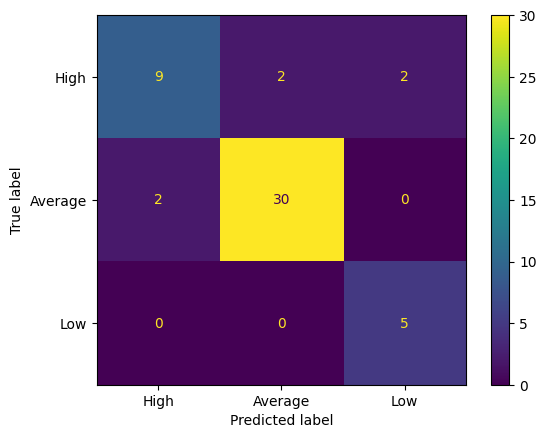

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
label=['High','Average','Low']
cmt=ConfusionMatrixDisplay(matr,display_labels=label)
cmt.plot()

**Model Creation using Naive Bayes Algorithm.**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
y_pred_nb=model_nb.predict(x_test)

**Performance Evaluation.**

In [ ]:
score_nb=accuracy_score(y_pred_nb,y_test)
matr_nb=confusion_matrix(y_pred_nb,y_test)
print(matr_nb)
score_nb

[[ 4  1  0]
 [ 2 31  0]
 [ 5  0  7]]


0.84

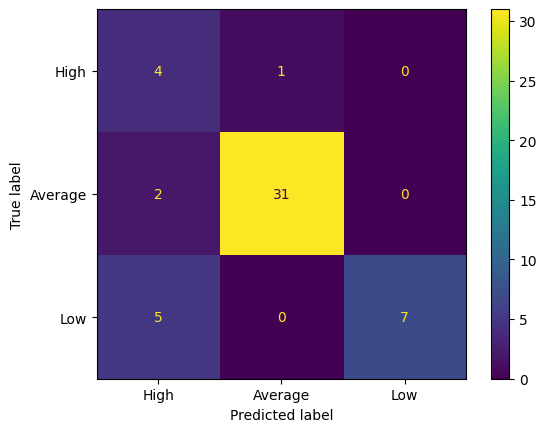

In [ ]:
label=['High','Average','Low']
cmt=ConfusionMatrixDisplay(matr_nb,display_labels=label)
cmt.plot()

**Model Creation using SVM Algorithm.**

In [ ]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train,y_train)
y_pred_svm=model_svm.predict(x_test)

**Performance Evaluation.**

In [ ]:
score_svm=accuracy_score(y_pred_svm,y_test)
matr_svm=confusion_matrix(y_pred_svm,y_test)
print(matr_svm)
score_svm

[[ 9  1  3]
 [ 2 31  0]
 [ 0  0  4]]


0.88

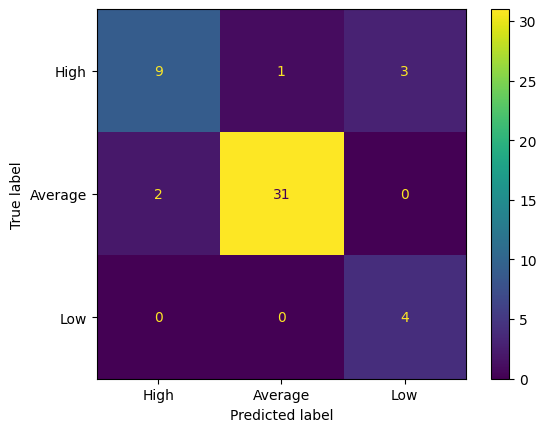

In [ ]:
label=['High','Average','Low']
cmt=ConfusionMatrixDisplay(matr_svm,display_labels=label)
cmt.plot()

**RESULT** : SVM has higher accuracy score so that it is best model.